In [9]:
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('yolov7-w6-pose.pt', map_location=device)
model = weigths['model']
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

In [11]:
image = cv2.imread('person2.png')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)   

print(image.shape)
    
output, _ = model(image)

In [12]:
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
# print(output.shape[0])
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
    print(output[idx, 7:])

[      235.5       32.75    0.030792       254.5       26.25    0.011467       219.5       23.75    0.013123       287.5        14.5    0.025467         196        22.5    0.048309      354.25       59.25     0.73486      128.25       60.25     0.76514      394.75      219.75     0.94824      72.062       220.5
     0.94775      329.25      323.25     0.96289      114.12      367.75     0.96289         313         380     0.99414      173.12      382.75     0.99512      314.75       615.5      0.9917      173.62       625.5     0.99219      313.75       836.5      0.9541      193.25         856     0.95654]


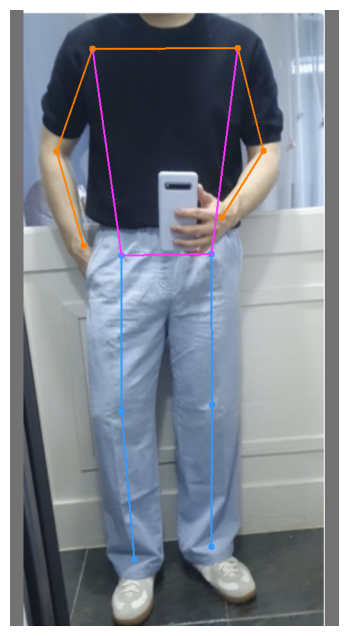

In [13]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()

In [ ]:
proper = 1
unproper = 0

flag = True

for img_path in unfit_review:
    flag = True
    image = cv2.imread(img_path)
    image = letterbox(image, 960, stride=64, auto=True)[0]
    image = transforms.ToTensor()(image)
    image = torch.tensor(np.array([image.numpy()]))
    
    if torch.cuda.is_available():
        image = image.half().to(device)   
        output, _ = model(image)
        
    output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
    
    with torch.no_grad():
        output = output_to_keypoint(output)
        
    if output.size == 0:
        unproper += 1
        continue
    
    for landmark_presence in output[0][15::3]:
        if landmark_presence < 0.8:
            flag = False
            break
        
    if flag:
        proper += 1
    else:
        unproper += 1
    
    print((unproper/(unproper + proper))*100)